In [1]:
import matplotlib.pyplot as plt

# So we have gone over MSE as a cost function that can be optimized with Gradient Descent, but MSE has some weaknesses. Using L2 loss leaves the line sensitive to outliers. Let's try to understand why.

In [60]:
x_set = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_set = [1,2,3,4,30,6,7,20,40,10,11,12,400,14,30,16,80,18,10,500]

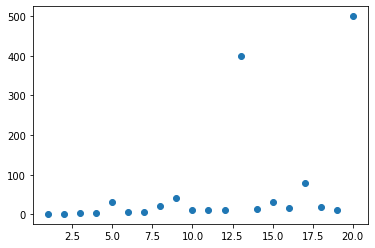

In [61]:
plt.scatter(x_set,y_set)
plt.show()

Outliers will try to pull the gradient descent in their direction. The line of best fit here is clearly going to be situated near the 4 points that fall along the same line. The outlier will surely affect the line, but it shouldn't have as large as a pull as we are going to demonstrate.


In [131]:
def gradient_descent(x,y,alpha,tolerance,iterations,theta_0=0,theta_1=0):
        i = 0
        list_of_theta_0s = [0]
        list_of_theta_1s = [0]
        mean_squared_error = sum([(theta_0 + (theta_1*x[i]) - y[i])**2 for i in range(len(x))])
        list_of_errors = []
        
        avg = 1/(len(x))
        while i < iterations:   
            
            
            #Calculate average of the partial derivative of theta_0  
            sum_of_MSE_theta_0 = 0                  
            for counter,value in enumerate(x):
                sum_of_MSE_theta_0 += ( (theta_0 + (theta_1*x[counter])) - y[counter])
                 
            
            #Calculate average of the partial derivative of theta_1    
            sum_of_MSE_theta_1 = 0                  
            for counter,value in enumerate(x):
                sum_of_MSE_theta_1 += (((theta_0 +(theta_1* x[counter])) - y[counter]) *   x[counter]   ) 
            
            
            
            
            #Update the value of theta_0
            new_theta_0 =  theta_0 - ((alpha * avg) * sum_of_MSE_theta_0)
            list_of_theta_0s.append(new_theta_0)
            
            #Update the value of theta_1
            new_theta_1 =  theta_1 - ((alpha * avg) * sum_of_MSE_theta_1)
            list_of_theta_1s.append(new_theta_1)
            
            
            new_mean_squared_error = sum([(theta_0 + (theta_1*x[i]) - y[i])**2 for i in range(len(x))])
            list_of_errors.append(mean_squared_error)
            if abs(new_mean_squared_error-mean_squared_error) <= tolerance:
                return new_theta_0,new_theta_1,list_of_theta_0s,list_of_theta_1s,list_of_errors,i
            mean_squred_error = new_mean_squared_error
            theta_0 = new_theta_0
            theta_1 = new_theta_1
            i+=1
            
            
        return new_theta_0,new_theta_1,list_of_theta_0s,list_of_theta_1s,list_of_errors,i
      
        

In [132]:
mse_theta_0,mse_theta_1,list_of_thetha_0s,list_of_theta_1s,list_of_errors,i = gradient_descent(x_set,y_set,0.001,0.0001,1000,theta_0=0,theta_1=1)

In [133]:
#Let's graph this line that was generated by MSE + Gradient Descent

list_to_plot = [mse_theta_0 + mse_theta_1 * x for x in x_set]

In [143]:
mse_theta_0

0.0502

In [144]:
mse_theta_1

1.8128000000000002

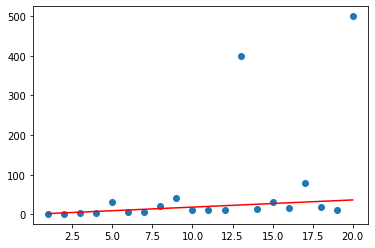

In [134]:
plt.plot(x_set,list_to_plot,color='red')
plt.scatter(x_set,y_set)

We can see that we've generated a line that doesn't really give us a good look at our data set. Now, we could easily just remove the outliers, and call it a day, but what happens if we come across outliers that can't be easily removed? We need some way to create a predictive algorithm that allows for these outliers.

# Alternative Cost Functions

Our issue here is that our cost function is squaring the error. This means that the error generated by outliers is so large, that in order the minimize overall error(remember it's mean), we have to have the line pulled in that direction. This has a huge impact on the reliability of our model. One other cost function that we can apply is called MAE.

# Mean Absolute Error

    In this cost function we are going to use the MAE to calculate the line of best fit.
    This is called L1 Loss. This is the appropriate estimator to use when we have outliers, or a ton of noise.

### Loss function

$|Y_{predicted}-Y_{actual}|$

This is going to serve as our Loss function instead of the MSE.

### Cost Function

$MAE = \frac{1}{m}\sum^{m}_{i=0}|Y^{i}_{predicted}-Y^{i}_{actual}|$

In [139]:
def gradient_descent_with_MAE(x,y,alpha,tolerance,iterations,theta_0=0,theta_1=0):
    avg = 1/(len(x))
    
    total_error = sum([abs(theta_0+(theta_1*x[i]) -y[i]) for i in range(len(x))])
    
    for i in range(0,iterations):
        
        sum_of_theta_1s = 0
        sum_of_theta_0s = 0
        
        for i in range(0,len(x)):
            
            sum_of_theta_1s += -x[i] * ((y[i]-(theta_1*x[i] + theta_0))/(abs(y[i]-(theta_1*x[i]-theta_0))))
            sum_of_theta_0s += -((y[i]-(theta_1*x[i] + theta_0))/(abs(y[i]-(theta_1*x[i]-theta_0))))
        
        new_theta_1 = theta_1 - (avg * sum_of_theta_1s * alpha)
        new_theta_0 = theta_0 - (avg * sum_of_theta_0s * alpha)
        
        new_total_error = sum([abs(new_theta_0 + (new_theta_1*x[i]) - y[i]) for i in range(len(x))])
        
        if abs(total_error-new_total_error) <= tolerance:
            return new_theta_0,new_theta_1
        
        total_error = new_total_error
        theta_0 = new_theta_0
        theta_1 = new_theta_1
        
    return new_theta_0,new_theta_1

In [140]:
mae_theta_0,mae_theta_1 = gradient_descent_with_MAE(x_set,y_set,0.001,0.001,1000,theta_0=0,theta_1=0)

In [141]:
list_to_plot = [mae_theta_0 + mae_theta_1 * x for x in x_set]

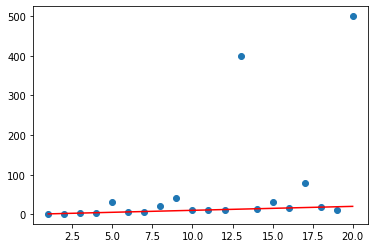

In [142]:
plt.plot(x_set,list_to_plot,color='red')
plt.scatter(x_set,y_set)

In [120]:
mae_theta_0

0.09512418381760417

In [121]:
mae_theta_1

0.9982481558882396

### Now we have a predictor line that is more robust to outliers. We can see though, that we do lose quite a bit accuracy in termsof outliers. We have opened ourself up to another issue though. One that occurs in special cases.

In [145]:
x_set_test = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_set_test = [1,2,3,4,30,1,7,20,40,10,11,12,400,14,30,16,80,18,10,500]

In [146]:
mae_theta_0,mae_theta_1 = gradient_descent_with_MAE(x_set,y_set,0.001,0.001,1000,theta_0=0,theta_1=0)

# Huber Loss


Huber M combines the Robustness at the outside, with the ability to be differentiated in the zero cases. It introduces
some hyperparameter Delta. Delta allows us to tell huber Loss when to use squared, and when to use absolute.

In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

In [147]:
from sklearn.linear_model import SGDRegressor


In [175]:
SGDR = SGDRegressor(loss='huber',penalty=None,alpha=0.0001,max_iter=1000,epsilon=0.1)

In [176]:
x_set_test = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20]]
y_set_test = [1,2,3,4,30,1,7,20,40,10,11,12,400,14,30,16,80,18,10,500]

In [177]:
SGDR.fit(x_set_test,y_set_test)

SGDRegressor(loss='huber', penalty=None)

In [178]:
SGDR.coef_

array([0.99615878])

In [179]:
SGDR.intercept_

array([0.09041235])

In [180]:
SGDR.predict([[30]])

array([29.97517574])